####Assignment 4
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
*   Univariate Analysis
*   Bi- Variate Analysis  
*   Multi - Variate Analysis  
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Scaling the data
9. Perform any of the clustering algorithms

10. Add the cluster data with the primary dataset
11. Split the data into dependent and independent
variables.
12. Split the data into training and testing
13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.

In [91]:
#1 - dataset downloaded
# Columns - CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [92]:
#2
import pandas as pd
import numpy as np

df = pd.read_csv(r'Mall_Customers.csv')
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Text(0, 0.5, 'Count')

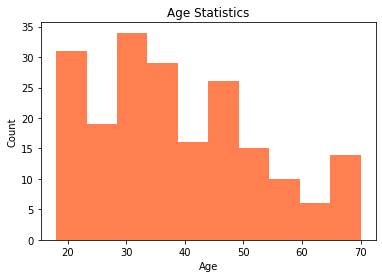

In [93]:
#3
#i) Univariate Analysis

import matplotlib.pyplot as plt

plt.hist(df['Age'],color='coral')
plt.title('Age Statistics')
plt.xlabel('Age')
plt.ylabel('Count')

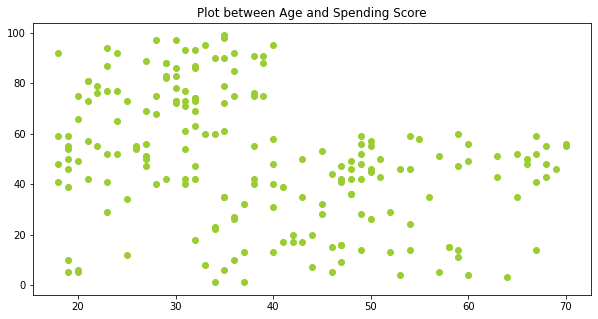

In [94]:
#3b - bivariate
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.scatter(df['Age'],df['Spending Score (1-100)'],color='yellowgreen')
plt.title('Plot between Age and Spending Score')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b4e729890>,
      dtype=object)

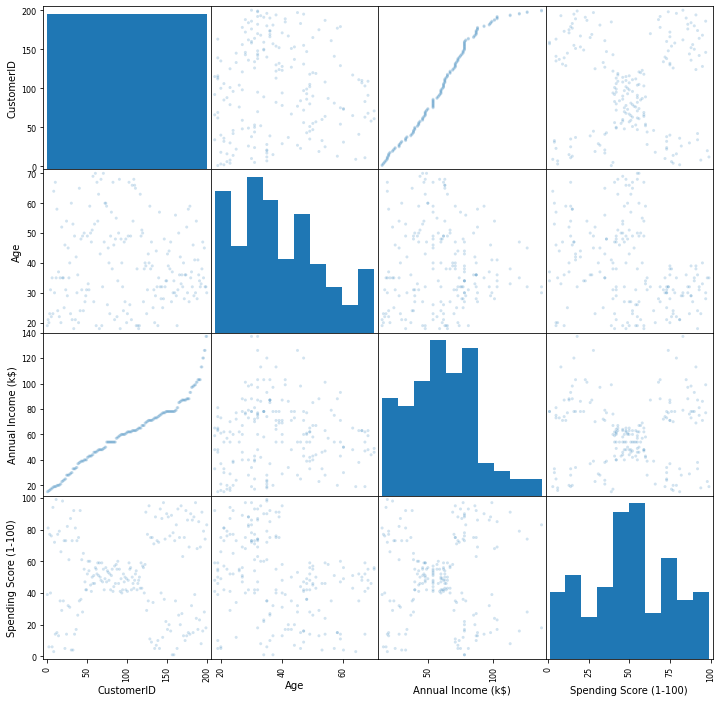

In [95]:
#3c) Multivariate analysis

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12,12))

In [96]:
#4
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
#5 - handling missing values
df.isnull().sum()     #prints the count of missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [98]:
#replaces missing values by mean(numeric) or mode(categorical)
df['CustomerID'] = df['CustomerID'].replace(np.NaN, df['CustomerID'].mean())

l=df['Gender'].mode()
df['Gender'] = df['Gender'].replace(np.NaN, l[0])

df['Age'] = df['Age'].replace(np.NaN, df['Age'].mean())
df['Annual Income (k$)'] = df['Annual Income (k$)'].replace(np.NaN, df['Annual Income (k$)'].mean())
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].replace(np.NaN, df['Spending Score (1-100)'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


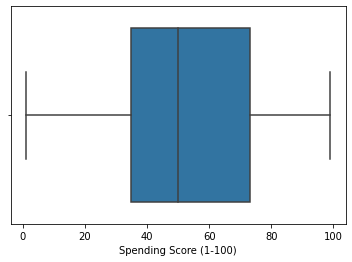

In [99]:
#6 Outlier detection - box plot
import seaborn as sns
sns.boxplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


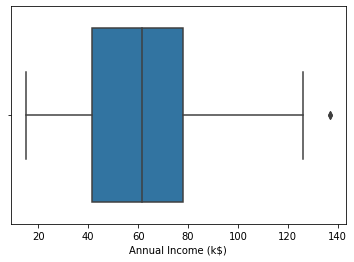

In [100]:
#6 Outlier detection - box plot
sns.boxplot(df['Annual Income (k$)'])

In [101]:
#6 Outlier detection - IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upper=Q3 + 1.5 * IQR
lower=Q1 - 1.5 * IQR
count = np.size(np.where(df['Age'] >upper))
count = count + np.size(np.where(df['Age'] <lower))
print('No. of outliers : ', count)

20.25
No. of outliers :  0


In [102]:
#6 Outlier detection - 3 sigma

upper = df.Age.mean() + (3 * df.Age.std())
lower = df.Age.mean() - (3 * df.Age.std())
columns = df[ ( df['Age'] > upper ) | ( df['Age']<lower ) ]
print('Upper range : ', upper)
print('Lower range : ', lower)
print('No. of Outliers : ', len(columns))

Upper range :  80.75702199467665
Lower range :  -3.0570219946766386
No. of Outliers :  0


In [103]:
#6 Outlier removal
columns = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [104]:
#After outlier removal
columns = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(df[i] >upper))
  count = count + np.size(np.where(df[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  CustomerID  :  0
No. of outliers in  Age  :  0
No. of outliers in  Annual Income (k$)  :  0
No. of outliers in  Spending Score (1-100)  :  0


In [105]:
#7 Column 'Gender' - Label Encoding
print('Before encoding : ', df['Gender'][0])
df['Gender'] = df['Gender'].astype('category')

df['Gender'] = df['Gender'].cat.codes
print('After encoding : ', df['Gender'][0])

df['Gender'].dtype

Before encoding :  Male
After encoding :  1


dtype('int8')

In [106]:
df.dtypes

CustomerID                float64
Gender                       int8
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [123]:
#8
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
1         2.0       1  21.0                15.0                    81.0
2         3.0       0  20.0                16.0                     6.0


After scaling : 
 [[-0.98994975  1.         -0.74074074 -1.2739726   0.81045752]
 [-0.9798995   0.         -0.79012346 -1.24657534 -1.1503268 ]]


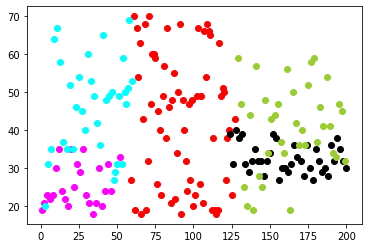

In [124]:
#9
from sklearn.cluster import KMeans
cols = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(df)

label_0 = df[label == 0]
label_1 = df[label == 1]
label_2 = df[label == 2]
label_3 = df[label == 3]
label_4 = df[label == 4]

plt.scatter(label_0[cols[0]] , label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]] , label_1[cols[1]], color = 'black')
plt.scatter(label_2[cols[0]] , label_2[cols[1]], color = 'yellowgreen')
plt.scatter(label_3[cols[0]] , label_3[cols[1]], color = 'magenta')
plt.scatter(label_4[cols[0]] , label_4[cols[1]], color = 'aqua')
plt.show()

In [125]:
#10
df['Cluster']=kmeans.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,1,19.0,15.0,39.0,3
1,2.0,1,21.0,15.0,81.0,3
2,3.0,0,20.0,16.0,6.0,4
3,4.0,0,23.0,16.0,77.0,3
4,5.0,0,31.0,17.0,40.0,4


In [126]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196.0,0,35.0,120.00,79.0,1
196,197.0,0,45.0,126.00,28.0,2
197,198.0,1,32.0,126.00,74.0,1
198,199.0,1,32.0,132.75,18.0,2
199,200.0,1,30.0,132.75,83.0,1


In [134]:
#11
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

print('Independent : ', X.head)
print('Dependent : ', Y.head)

Independent :  <bound method NDFrame.head of      CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1.0       1  19.0               15.00                    39.0
1           2.0       1  21.0               15.00                    81.0
2           3.0       0  20.0               16.00                     6.0
3           4.0       0  23.0               16.00                    77.0
4           5.0       0  31.0               17.00                    40.0
..          ...     ...   ...                 ...                     ...
195       196.0       0  35.0              120.00                    79.0
196       197.0       0  45.0              126.00                    28.0
197       198.0       1  32.0              126.00                    74.0
198       199.0       1  32.0              132.75                    18.0
199       200.0       1  30.0              132.75                    83.0

[200 rows x 5 columns]>
Dependent :  <bound method NDFrame.head of

In [135]:
#12
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(160, 5) (40, 5) (160,) (40,)


In [136]:
#13
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [137]:
#14 - training
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [138]:
#15 - testing
y_pred = model.predict(X_test)
print(y_pred)

[2 3 4 3 2 3 4 0 4 4 1 0 3 0 2 2 0 1 2 4 4 0 4 0 0 1 4 2 1 4 1 2 3 4 3 1 0
 0 0 2]


In [139]:
model.score(X_train,Y_train)

0.95

In [140]:
#16
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Y_test, y_pred)
mean_squared_error = mean_squared_error(Y_test, y_pred)
rmse = (np.sqrt(mean_squared_error))

print('R2 score : ', r2)
print('Mean squared error : ', mean_squared_error)
print('Root Mean squared error : ', rmse)

R2 score :  0.9887608878898567
Mean squared error :  0.025
Root Mean squared error :  0.15811388300841897


In [141]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test,y_pred)

array([[ 9,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 10]])

In [142]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

